In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u

import sys
sys.path.insert(0, '../')

In [2]:
from libra.starspots import Star, Spot

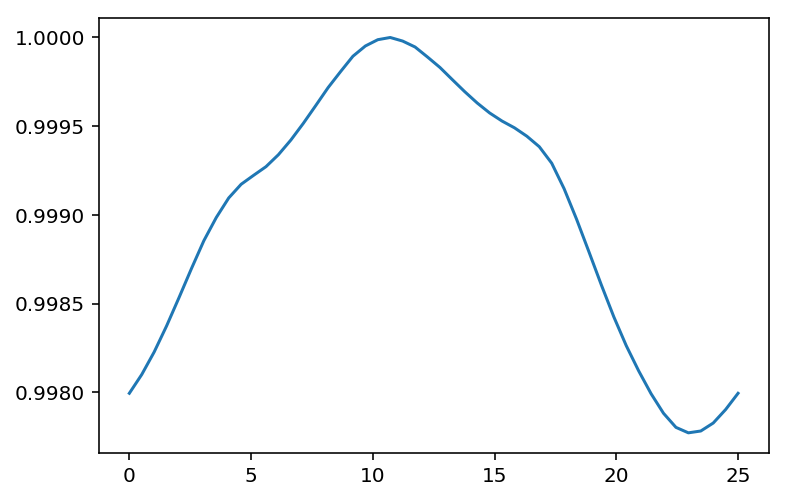

In [30]:
spots = [Spot.from_sunspot_distribution(90*u.deg, radius_multiplier=5) 
         for i in range(10)]

sun = Star(spots, inclination=90*u.deg)

times = np.linspace(0, 25, 50)
f = sun.flux(times)

plt.plot(times, f/np.max(f))

../libra/starspots/star.py:351: RuntimeWarning: invalid value encountered in sqrt
  mu = np.sqrt(1 - r**2)


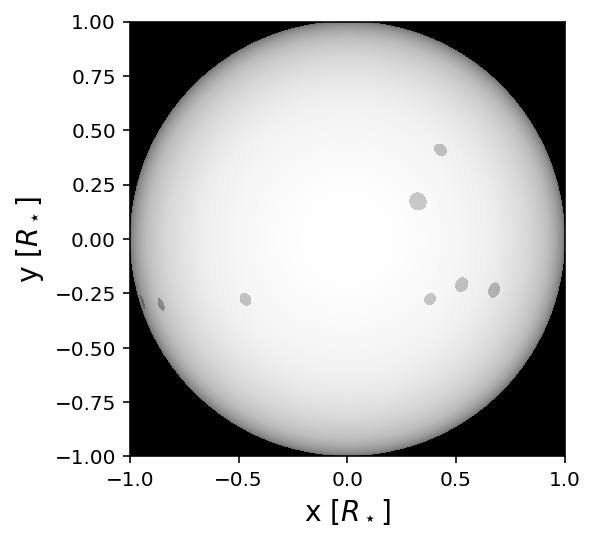

In [31]:
sun.plot()

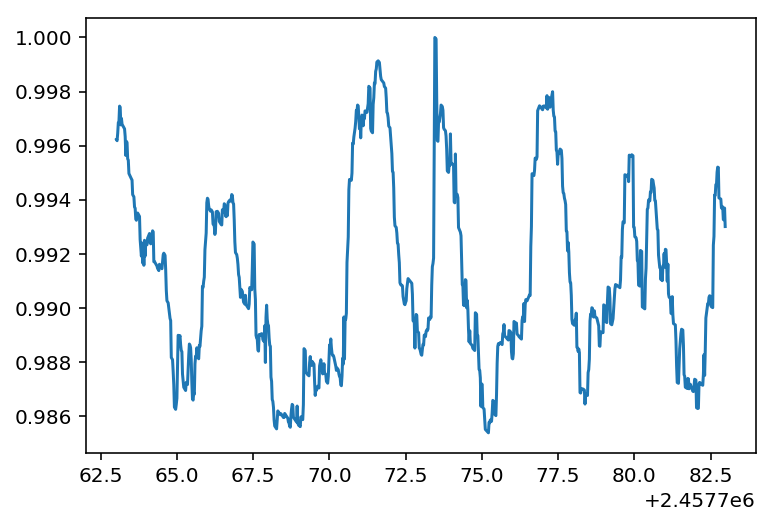

In [5]:
trappist_t, trappist_f, e = np.loadtxt('../../stsp_trappist1/trappist_rotation.txt', unpack=True)

plt.plot(trappist_t, trappist_f)

In [53]:
spots = [Spot.from_latlon(15, 90, 90, 0.105, contrast=0), 
         Spot.from_latlon(-15, -20, 90, 0.1, contrast=0.2)]#, 
         #Spot.from_latlon(0, 0, 90, 0.1, contrast=0.9)]

star = Star(spots=spots, inclination=90*u.deg, rotation_period=3.3*u.day, 
            u1=1.00, u2=-0.04)

fluxes = star.flux(times=trappist_t, t0=2457766.1)
fluxes /= np.max(fluxes)

../libra/starspots/star.py:351: RuntimeWarning: invalid value encountered in sqrt
  mu = np.sqrt(1 - r**2)


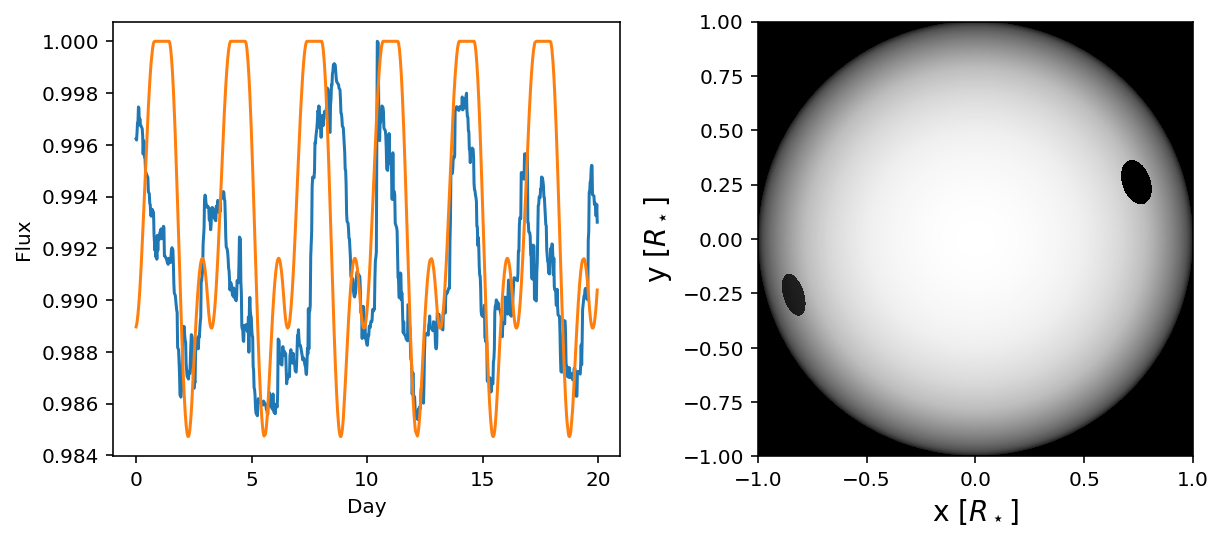

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(trappist_t - trappist_t.min(), trappist_f, label='TRAPPIST-1')
ax[0].plot(trappist_t - trappist_t.min(), fluxes, label='Simple model')
star.rotate(-40*u.deg)
star.plot(ax=ax[1])
ax[0].set(xlabel='Day', ylabel='Flux')
plt.legend()
fig.savefig('trappist1_manual.pdf', bbox_inches='tight')